<a href="https://colab.research.google.com/github/DilshanBotheju/EmotionDetectionUsingTexts-NLP-/blob/ModelDevelopment/EDA%2CFeatureEnginnering%26ModelDevelopment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Connect with google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load necessary libraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
import pickle

Loading the dataset

In [4]:
# Load the dataset
file_path = "/content/drive/MyDrive/Emotion, Hate Speech and Violence Detection using NLP/datasets/preprocessed_emotion_dataset.csv"
Emotion_data = pd.read_csv(file_path, encoding="latin-1")

In [5]:
Emotion_data.head()

,label,cleaned_text
0,0,ive learned surround women lift leave feeling ...
1,0,already feel crappy upset situation doesnt help
2,0,feel like lost mourned moved past tears relati...
3,0,could write whole lot im feeling crappy dont t...
4,0,always seem feel inadequate


In [6]:
# Check for null values
Emotion_data.isnull().sum()

,0
label,0
cleaned_text,1


In [7]:
# Remove values
Emotion_data.dropna(inplace=True)

In [8]:
# Check for null values
Emotion_data.isnull().sum()

,0
label,0
cleaned_text,0


Exploratory Data Analysis(EDA)

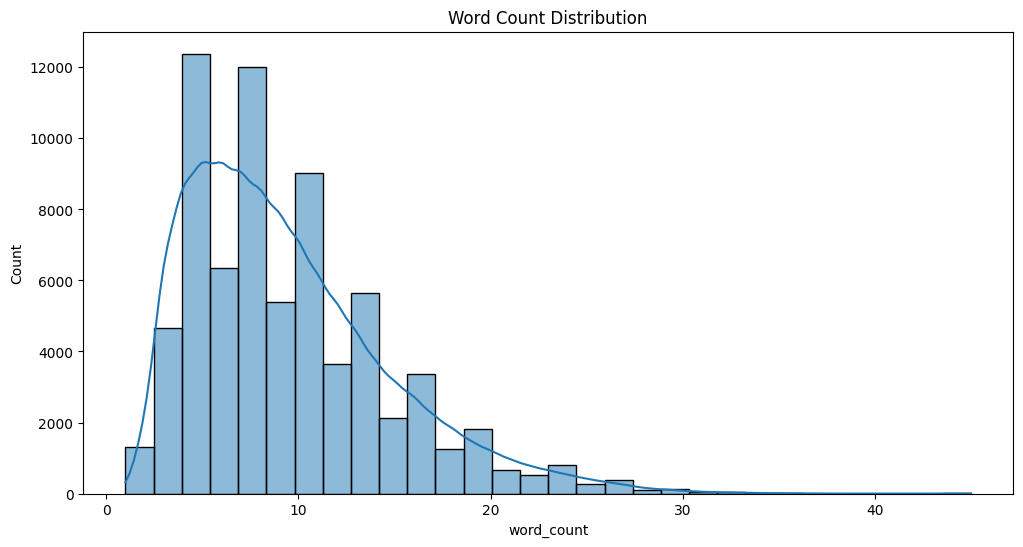

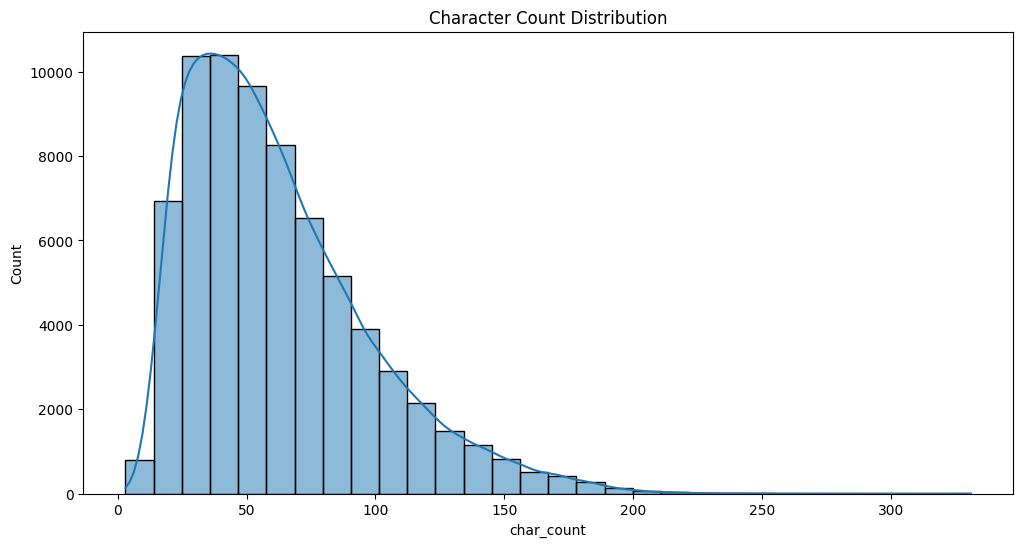

In [9]:
# Visualizing word count and sentence length distribution
Emotion_data["word_count"] = Emotion_data["cleaned_text"].apply(lambda x: len(x.split()))
Emotion_data["char_count"] = Emotion_data["cleaned_text"].apply(lambda x: len(x))

plt.figure(figsize=(12, 6))
sns.histplot(Emotion_data["word_count"], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(Emotion_data["char_count"], bins=30, kde=True)
plt.title("Character Count Distribution")
plt.show()

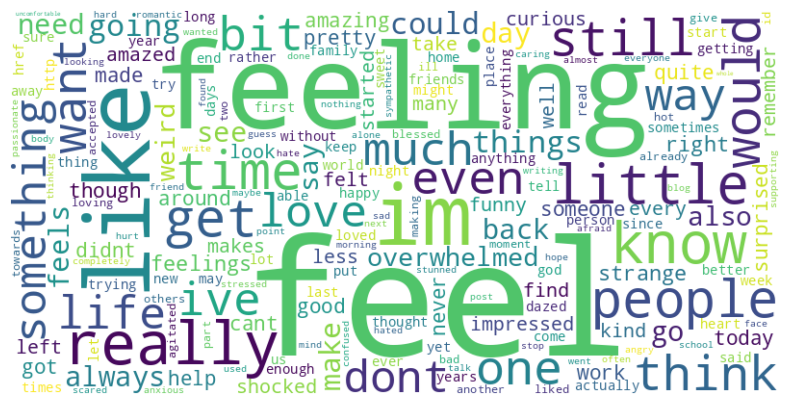

In [10]:
# Visualizing most frequent words
all_words = " ".join(Emotion_data["cleaned_text"])
word_freq = Counter(all_words.split())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [11]:
# Drop uneceassar columns
Emotion_data.drop(["word_count","char_count"], axis=1, inplace=True)

Feature Enginnering

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vecorization of text
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(Emotion_data["cleaned_text"])

print(X_tfidf.shape)

(71999, 5000)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


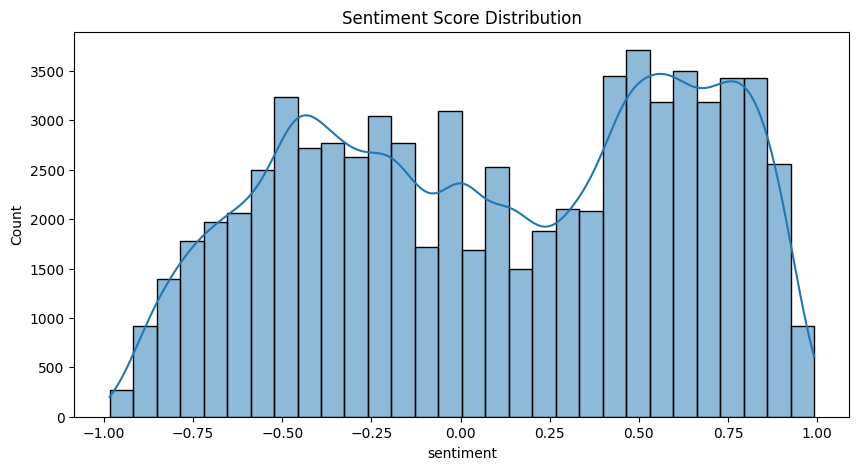

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Sentimental analysis of the dataset
Emotion_data["sentiment"] = Emotion_data["cleaned_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

# Plot sentiment distribution
plt.figure(figsize=(10, 5))
sns.histplot(Emotion_data["sentiment"], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()


In [14]:
# Combine features
X = np.hstack((X_tfidf.toarray(), Emotion_data["sentiment"].values.reshape(-1, 1)))
y = Emotion_data["label"]

In [15]:
print(X.dtype)
print(X[:5])

float64
[[ 0.      0.      0.     ...  0.      0.      0.1779]
 [ 0.      0.      0.     ...  0.      0.     -0.8155]
 [ 0.      0.      0.     ...  0.      0.     -0.4588]
 [ 0.      0.      0.     ...  0.      0.     -0.0516]
 [ 0.      0.      0.     ...  0.      0.     -0.4019]]


Model Development

In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset to train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((50399, 5001), (21600, 5001))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the multinomial logistic regression model
log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the training set
y_pred_train = log_reg.predict(X_train)

# Predict on the test set
y_pred_test = log_reg.predict(X_test)

# Evaluate the model on the training set
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy: 0.9388479930157344
Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8457
           1       0.95      0.90      0.92      8413
           2       0.93      0.98      0.95      8310
           3       0.95      0.95      0.95      8373
           4       0.94      0.89      0.92      8426
           5       0.91      0.98      0.94      8420

    accuracy                           0.94     50399
   macro avg       0.94      0.94      0.94     50399
weighted avg       0.94      0.94      0.94     50399

Test Accuracy: 0.9127314814814815
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3543
           1       0.91      0.88      0.89      3587
           2       0.92      0.95      0.93      3690
           3       0.92      0.92      0.92      3626
           4       0.90      0.86      0.88      3574


In [19]:
import pickle

# Save the Logistic Regression model to a file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

# Save the TfidfVectorizer to a file
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


In [35]:
from google.colab import files

# Download the Logistic Regression model
files.download('logistic_regression_model.pkl')

# Download the TF-IDF Vectorizer
files.download('tfidf_vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# Load the model and vectorizer
with open("logistic_regression_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

# Example text input
test_text = "I care about you so much"

# Vectorize input text
X_tfidf_test = tfidf_vectorizer.transform([test_text]).toarray()

# Extract sentiment score
sentiment_score_test = np.array([[sia.polarity_scores(test_text)["compound"]]])

# Combine features
X_test = np.hstack((X_tfidf_test, sentiment_score_test))

# Predict the emotion class
prediction = model.predict(X_test)

print(f"Predicted Emotion Class: {prediction[0]}")


Predicted Emotion Class: 2
